# Assignment : Dimensionality Reduction

# Introduction

1. Customer Personality Analysis involves a comprehensive examination of a company's ideal customers. This analysis enables businesses to gain deeper insights into their customers, allowing them to tailor products to meet the specific needs, behaviors, and concerns of various customer segments.

<center><img src="https://media.licdn.com/dms/image/D5605AQFw8OHV-lz5RA/feedshare-thumbnail_720_1280/0/1685620551936?e=2147483647&v=beta&t=fCdsvBAlHWLZBV3BwV1vhDR9IzUeaLGQN-le1nzj9-k" width=500/></center>

2. By conducting Customer Personality Analysis, businesses can effectively modify their products to align with the preferences of their target audience across different segments. For instance, instead of spending resources on marketing a new product to every customer in their database, a company can identify which customer segment is most likely to purchase the product and focus their marketing efforts specifically on that group.

  [Dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data)

# STEP 1: Import the necessary Libraries

In [12]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
from sklearn.preprocessing import StandardScaler  # For standardizing features by removing the mean and scaling to unit variance

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# STEP 2: Loading the Data


### Dataset Information:
* `ID`: Unique identifier for each customer.

* `Year_Birth`: The year the customer was born.

* `Education`: The highest level of education attained by the customer (e.g., Graduation, Master, PhD).

* `Marital_Status`: The current marital status of the customer (e.g., Single, Married, Together, Divorced).

* `Income`: The annual income of the customer.

* `Kidhome`: The number of children living at home with the customer.

* `Teenhome`: The number of teenagers living at home with the customer.

* `Dt_Customer`: The date when the customer registered with the company.

* `Recency`: The number of days since the customer last made a purchase.

* `MntWines`: The amount of money spent on wine by the customer.

* `NumWebVisitsMonth`: The number of times the customer visited the company's website in the last month.

* `AcceptedCmp1`: Indicator of whether the customer accepted the first marketing campaign (0 = No, 1 = Yes).

* `AcceptedCmp2`: Indicator of whether the customer accepted the second marketing campaign (0 = No, 1 = Yes).

* `AcceptedCmp3`: Indicator of whether the customer accepted the third marketing campaign (0 = No, 1 = Yes).

* `AcceptedCmp4`: Indicator of whether the customer accepted the fourth marketing campaign (0 = No, 1 = Yes).

* `AcceptedCmp5`: Indicator of whether the customer accepted the fifth marketing campaign (0 = No, 1 = Yes).

* `Complain`: Indicator of whether the customer has lodged a complaint (0 = No, 1 = Yes).

* `Z_CostContact`: The cost associated with contacting the customer.

* `Z_Revenue`: The revenue generated from the customer.

* `Response`: Indicator of whether the customer responded to the last marketing campaign (0 = No, 1 = Yes).

### 2.1 Load the dataset, set columns to display 30, and view it
* Identify the type of values (numerical, categorical, or any format) present in the columns.

In [13]:
# Load the dataset, marketing_campaign.csv, into a pandas DataFrame
df = pd.read_csv('./resources/marketing_campaign.csv', sep='\t')

# Set the maximum number of columns to display to 30
pd.set_option('display.max_columns', 30)

# Display the first 5 rows
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### 2.2 View the columns of the data and understand them

In [14]:
# Display all column names in the DataFrame
df.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

### 2.3 Check the shape of the dataset

In [15]:
# Get the shape of the DataFrame
df.shape

(2240, 29)


### 2.4 Understand the datatypes of each of the columns

In [16]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 2.5 Generate Descriptive Statistics

In [17]:
# Generate descriptive statistics for numeric columns
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### 2.6 Handling outliers

### 2.6.1 Remove outliers based on the "Income" column where the income is greater than 600,000.

Then, display the total number of data points remaining after the removal of these outliers.

In [18]:
# Filter the dataset to remove rows where "Income" is greater than 600,000
df_filtered = df[df['Income'] <= 600000]

# Print the total number of data points remaining after outlier removal
print("Total data points after outlier removal:", df_filtered.shape[0])

Total data points after outlier removal: 2215


### 2.6.2 Removing the rows where Year_Birth is lower than 1940

In [19]:
# Keep only rows where 'Year_Birth' is 1940 or later
df_filtered = df_filtered[df_filtered['Year_Birth'] >= 1940]

# Print the total number of data points remaining after outlier removal
print("Total data points after outlier removal:", df_filtered.shape[0])


Total data points after outlier removal: 2212


### 2.7 Check the Null values

In [20]:
# Use isna() to check the null values
null_values = df_filtered.isna().sum()
print(null_values)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


### 2.8 Check for duplicate values

In [21]:
# Check for duplicate values
duplicate_count = df_filtered.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


### 2.9 Check the number of unique type of values in the each column.(Hint: Use nunique())

In [22]:
# Count of unique types in each column
for column in df_filtered.columns:
    unique_count = df_filtered[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'ID' has 2212 unique values.
Column 'Year_Birth' has 56 unique values.
Column 'Education' has 5 unique values.
Column 'Marital_Status' has 8 unique values.
Column 'Income' has 1970 unique values.
Column 'Kidhome' has 3 unique values.
Column 'Teenhome' has 3 unique values.
Column 'Dt_Customer' has 662 unique values.
Column 'Recency' has 100 unique values.
Column 'MntWines' has 775 unique values.
Column 'MntFruits' has 158 unique values.
Column 'MntMeatProducts' has 553 unique values.
Column 'MntFishProducts' has 182 unique values.
Column 'MntSweetProducts' has 176 unique values.
Column 'MntGoldProds' has 212 unique values.
Column 'NumDealsPurchases' has 15 unique values.
Column 'NumWebPurchases' has 15 unique values.
Column 'NumCatalogPurchases' has 14 unique values.
Column 'NumStorePurchases' has 14 unique values.
Column 'NumWebVisitsMonth' has 16 unique values.
Column 'AcceptedCmp3' has 2 unique values.
Column 'AcceptedCmp4' has 2 unique values.
Column 'AcceptedCmp5' has 2 uniq

### 2.10 Drop the `ID` and `Dt_Customer` columns as they are not much useful for the clustering.

In [23]:
# Drop ID, Dt_Customer columns
df_filtered = df_filtered.drop(columns=['ID', 'Dt_Customer'])

## STEP 3: Exploratory Data Analysis(EDA)

### 3.1 Create the histograms for all the numeric features

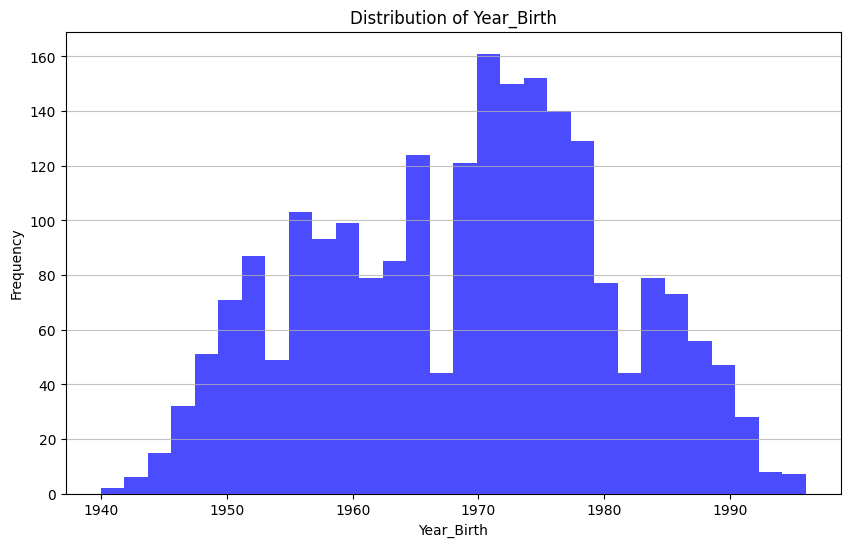

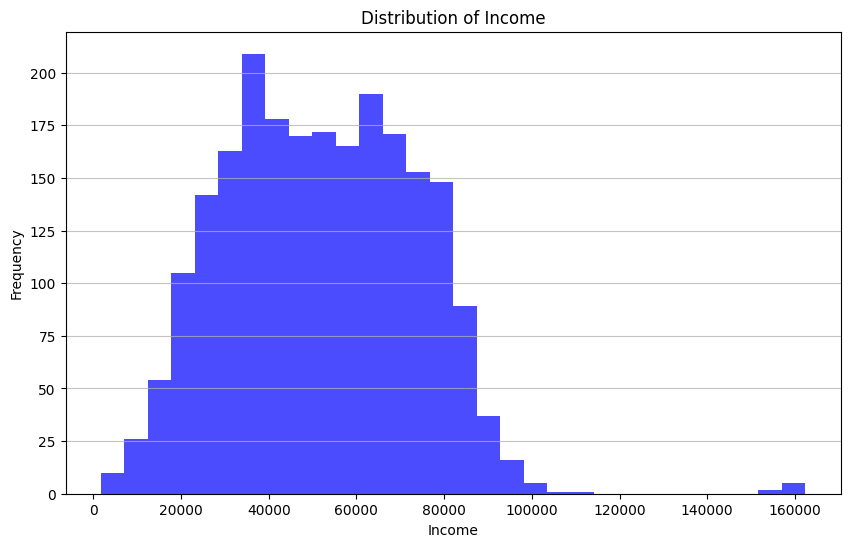

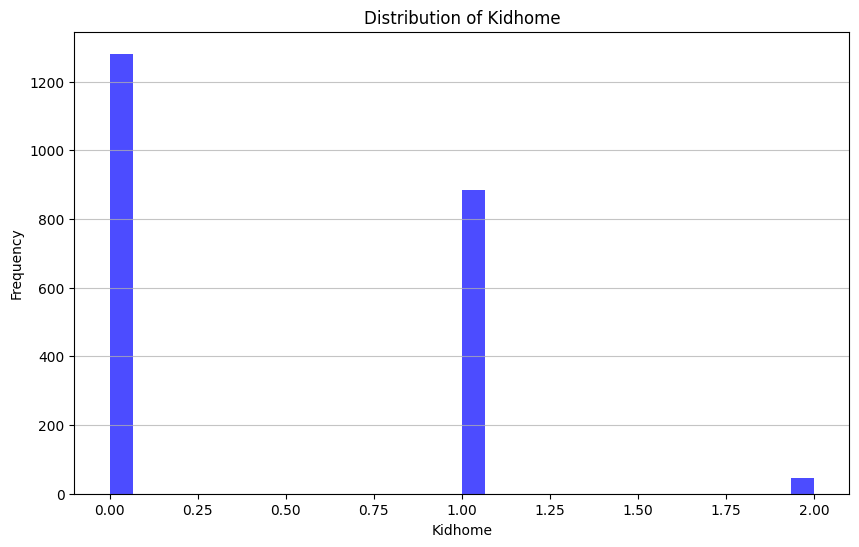

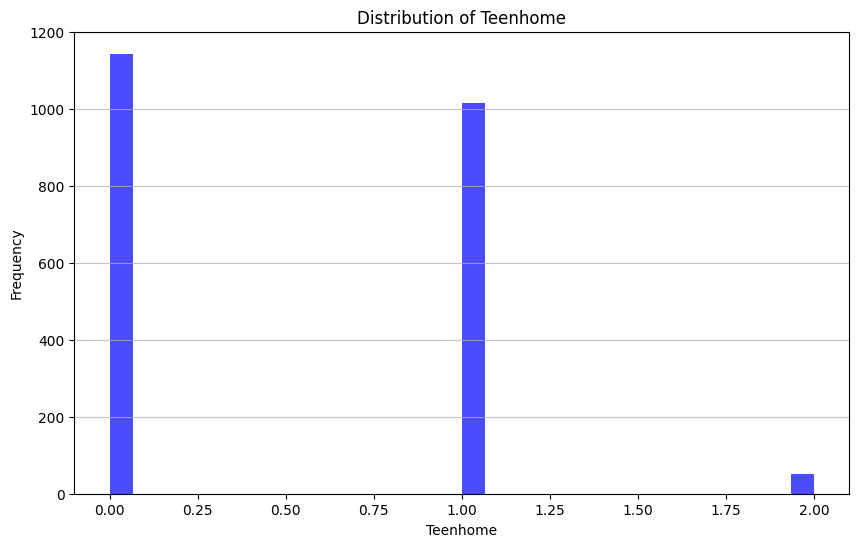

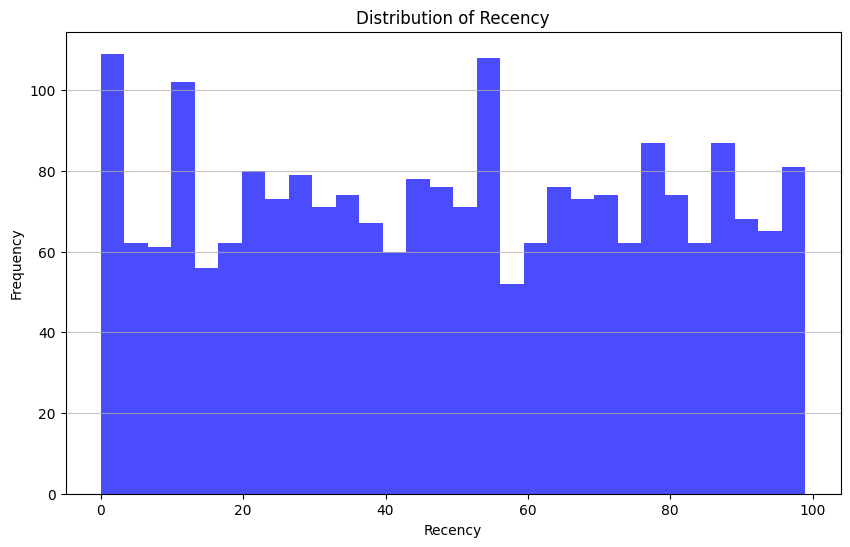

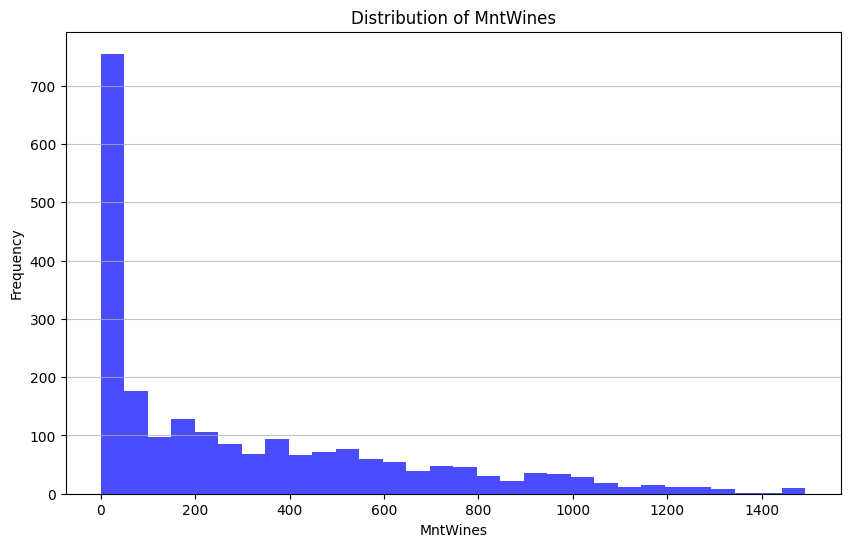

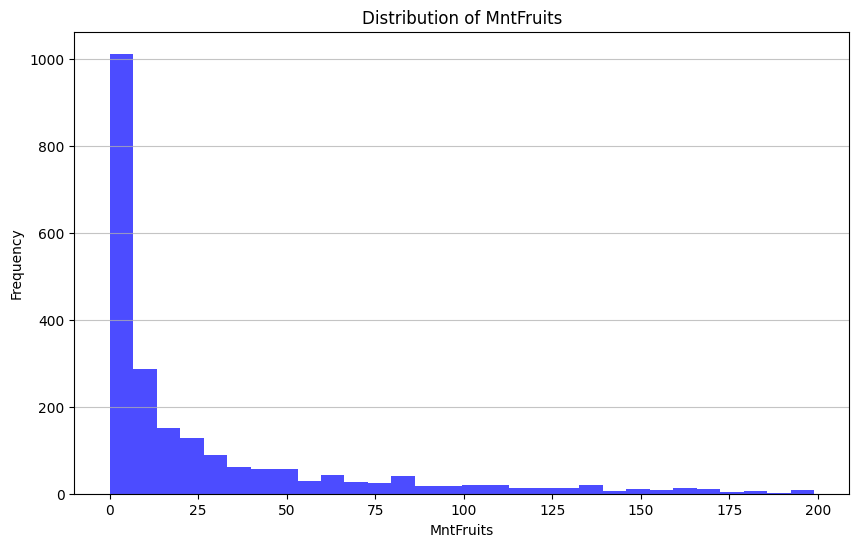

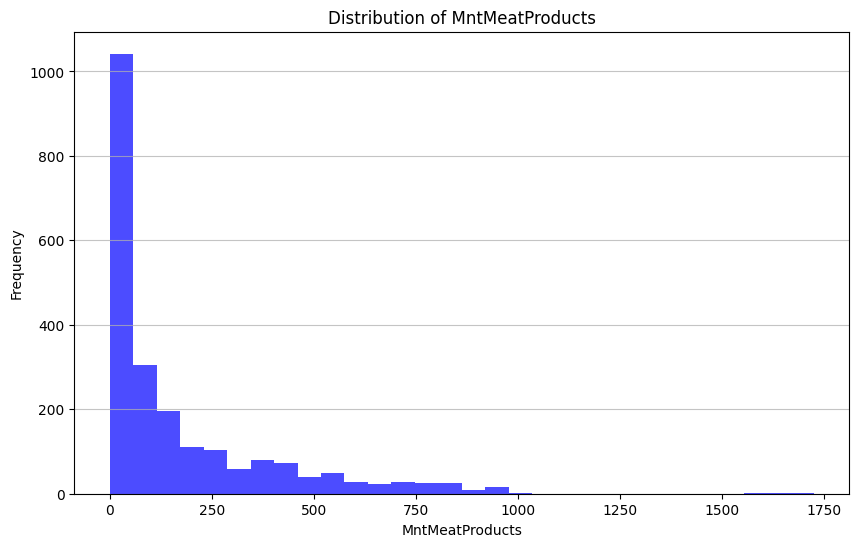

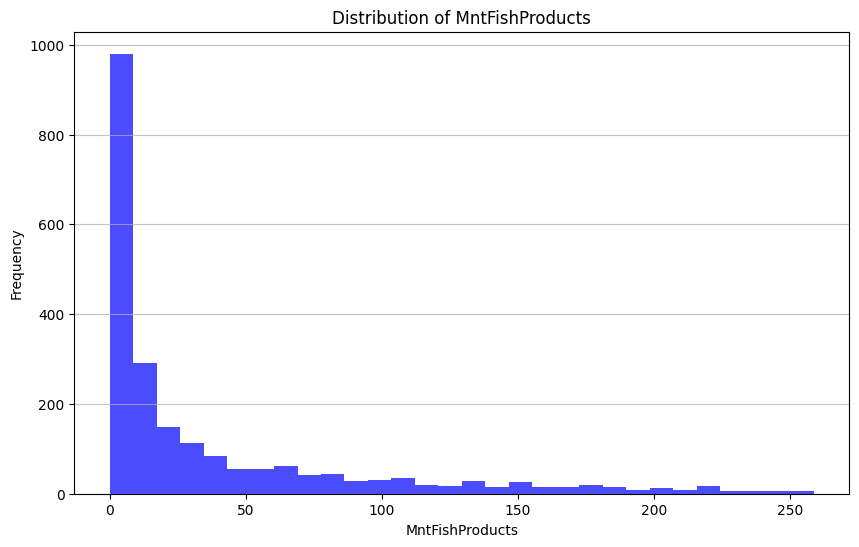

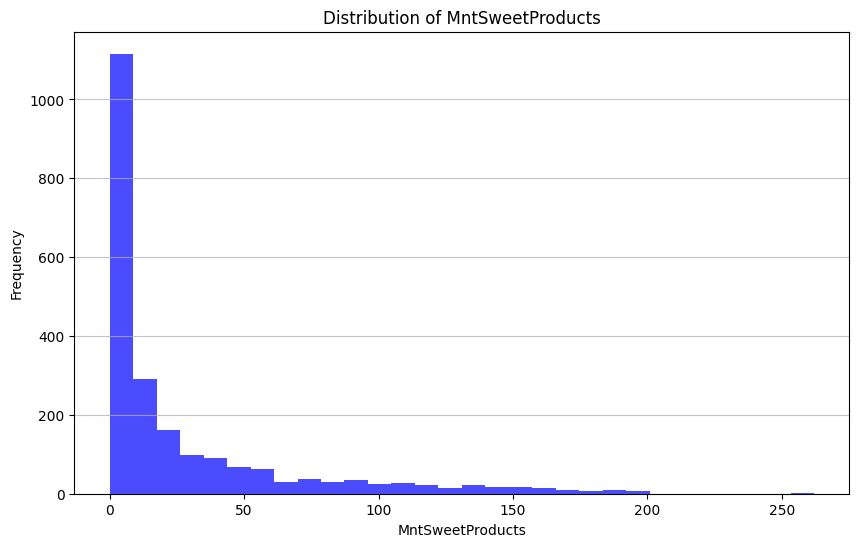

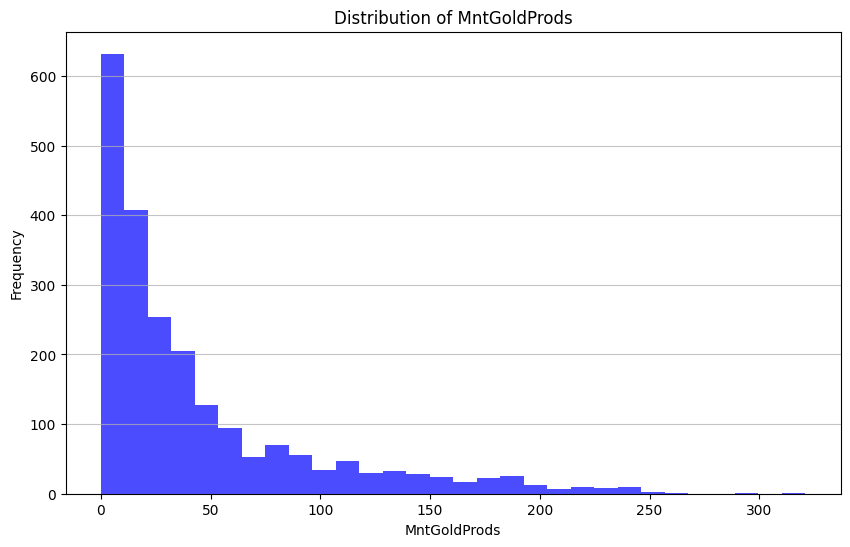

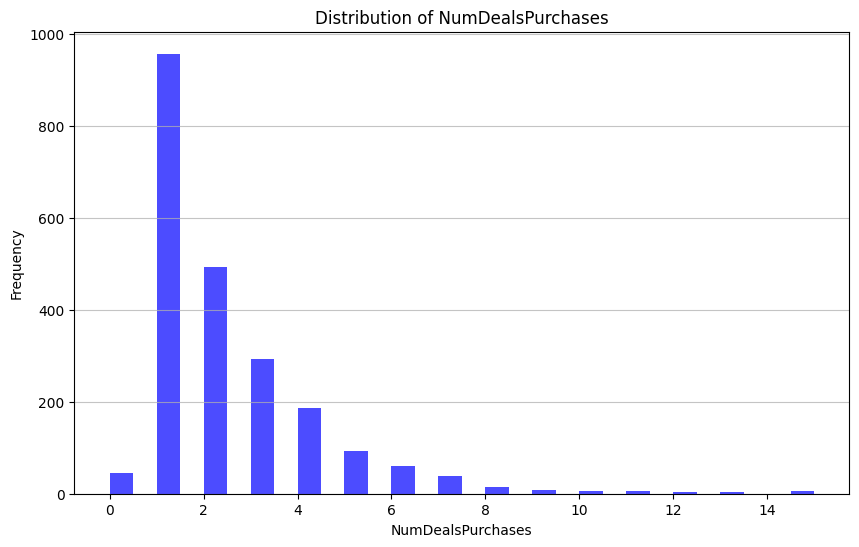

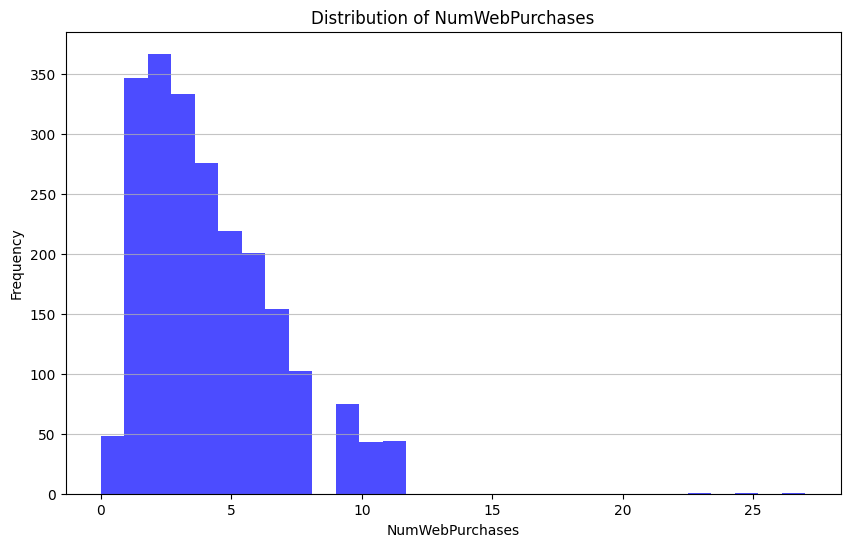

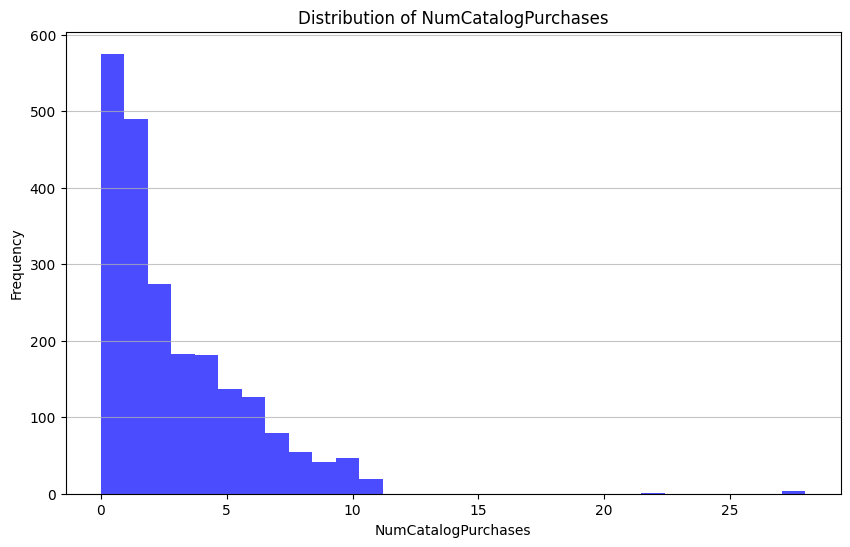

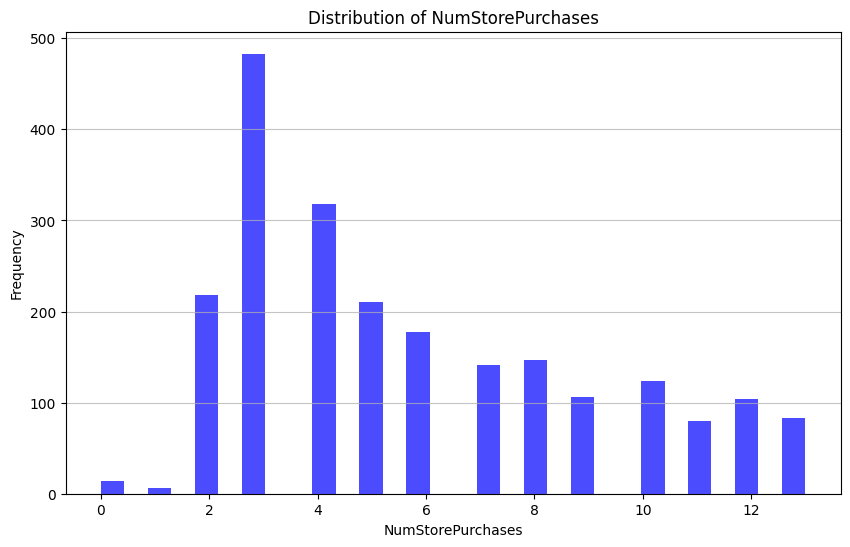

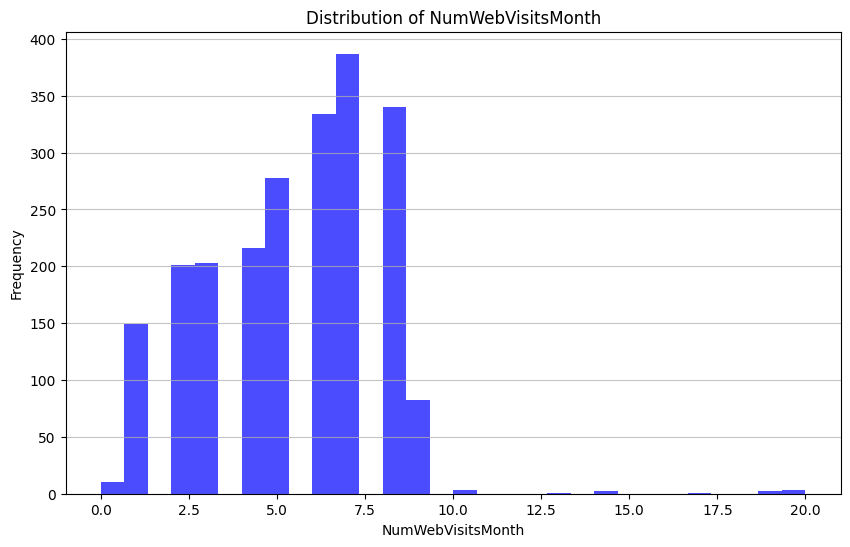

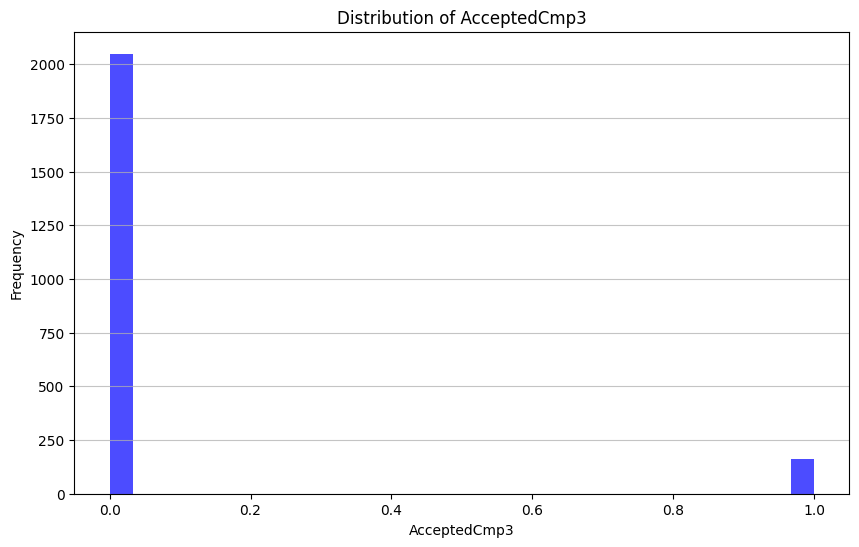

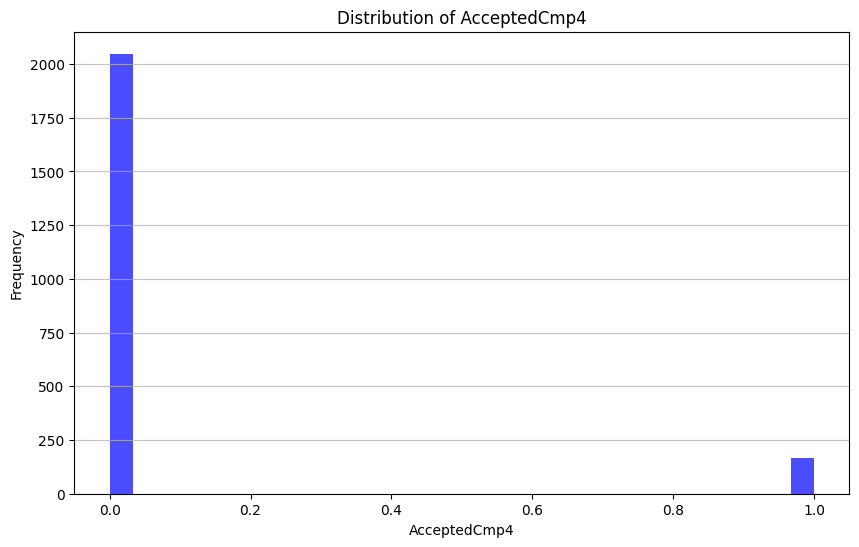

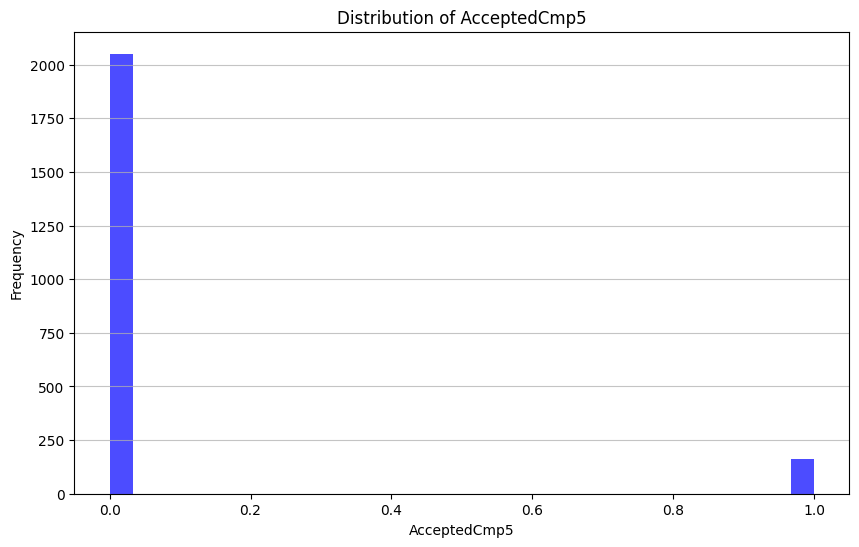

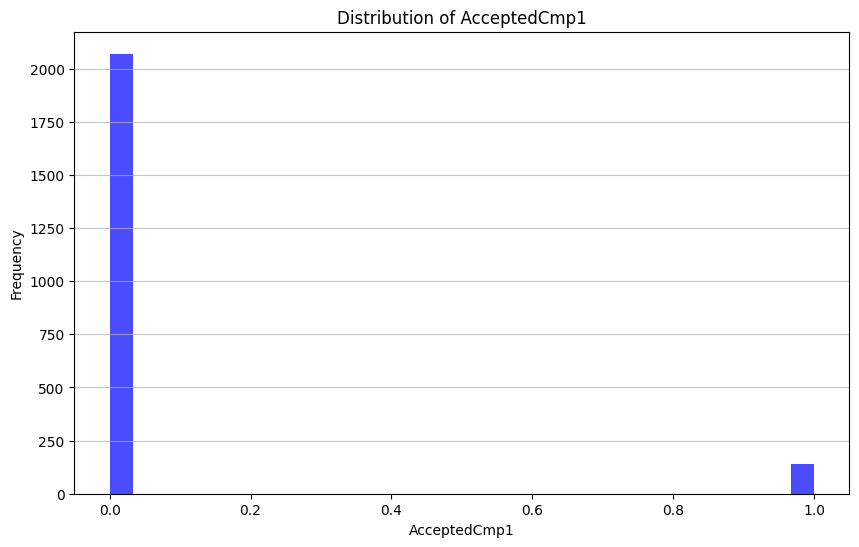

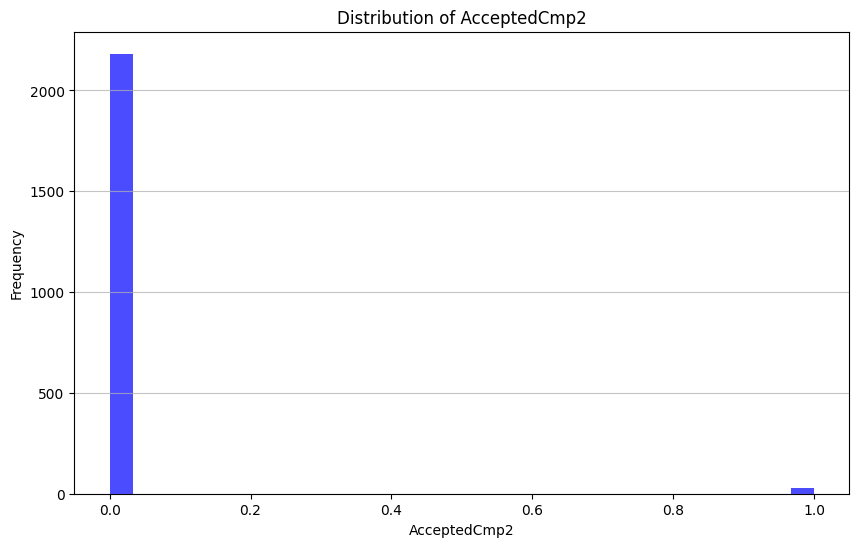

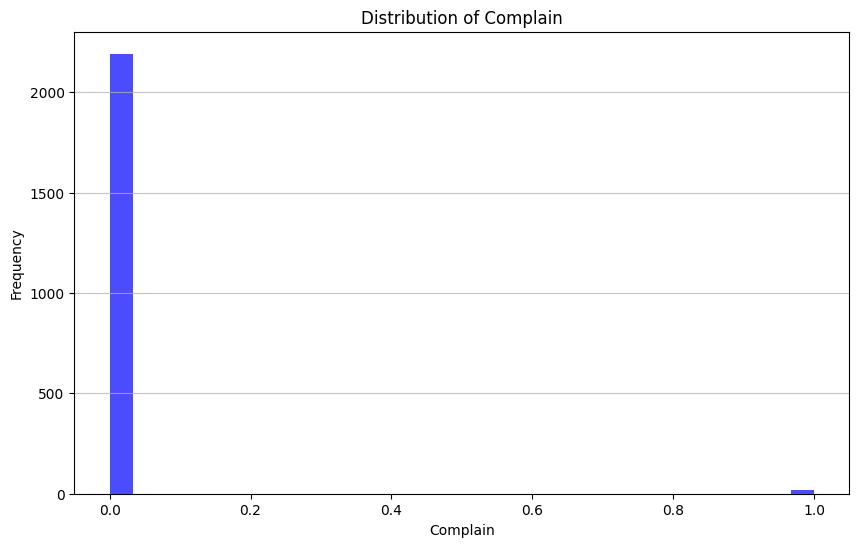

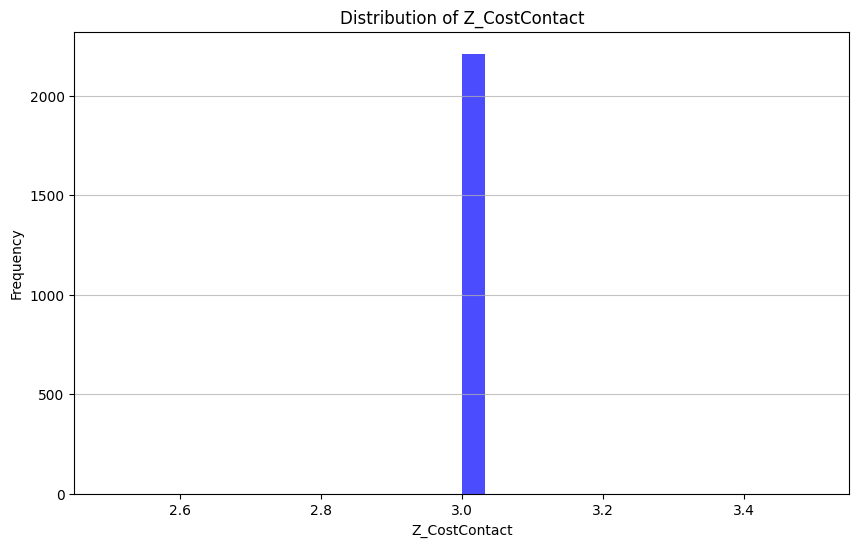

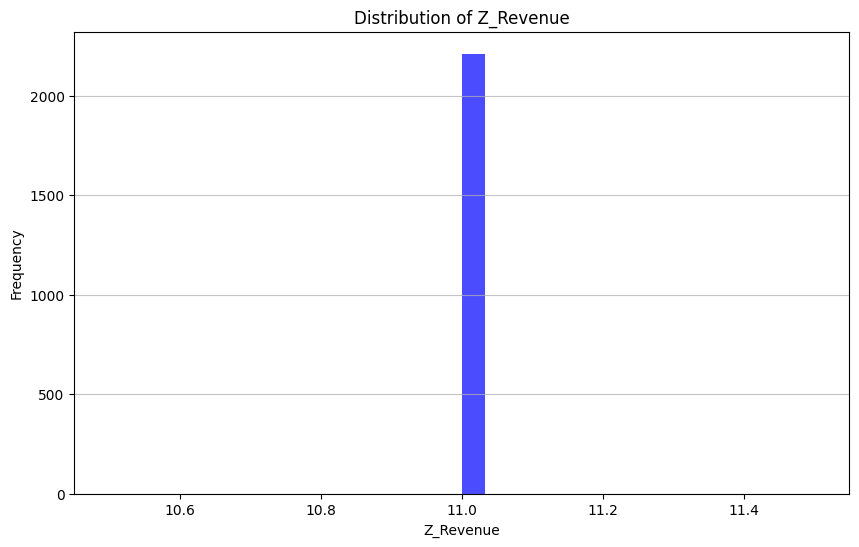

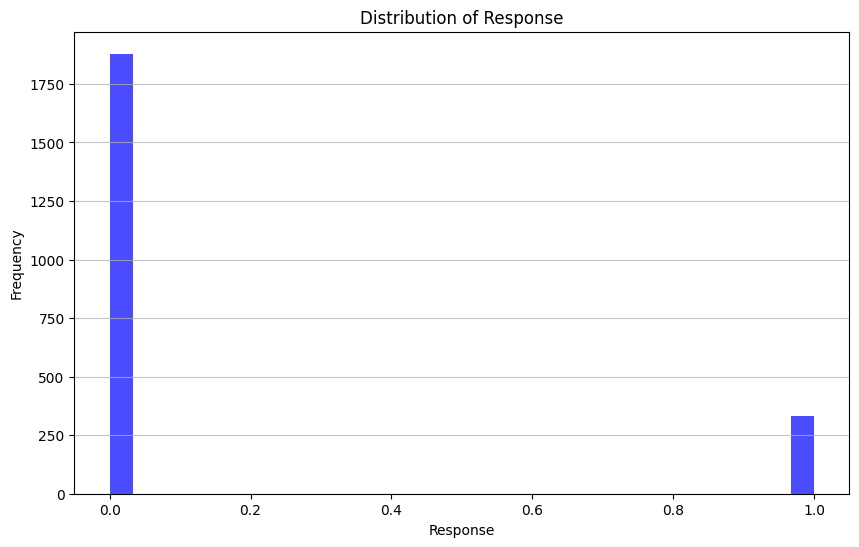

In [24]:
# Selecting only numeric features from the dataframe
numerical_features = df_filtered.select_dtypes(include=[np.number]).columns.tolist()

# Loop through each numerical feature and plot a histogram
import matplotlib.pyplot as plt

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    plt.hist(df_filtered[feature], bins=30, color='blue', alpha=0.7)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.show()


### 3.2 Create a heatmap and check the correlation

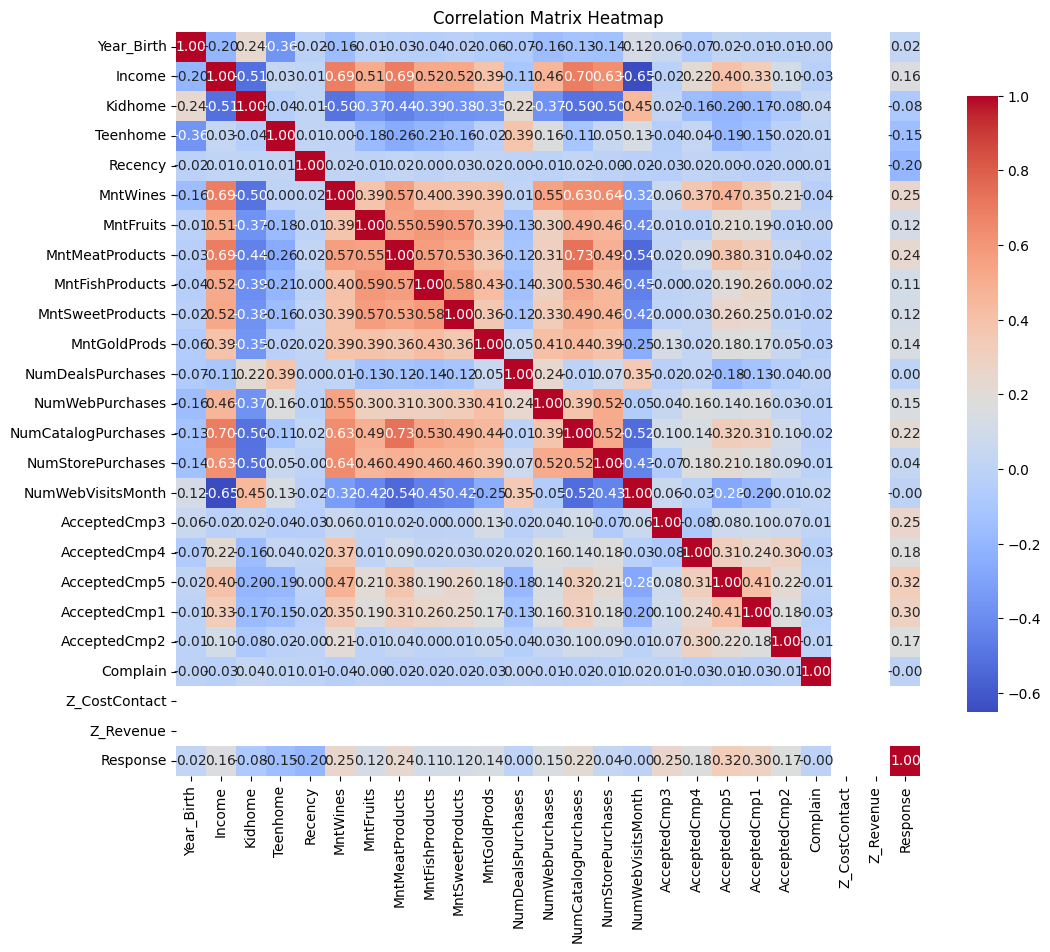

In [41]:
# Compute the correlation matrix
corr_matrix = df_filtered.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix Heatmap")
plt.show()


### 3.3 Create the Bar plots for the `Education` and `Martial_status` columns

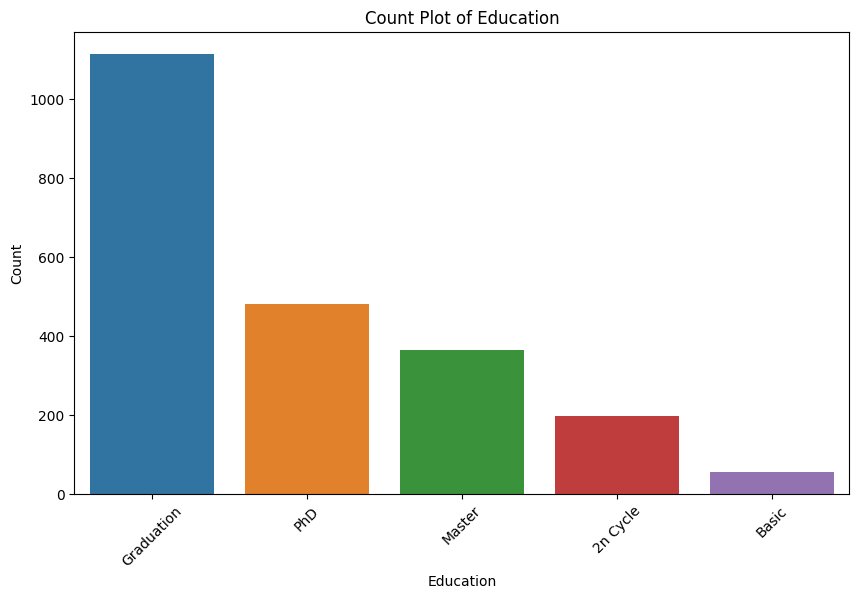

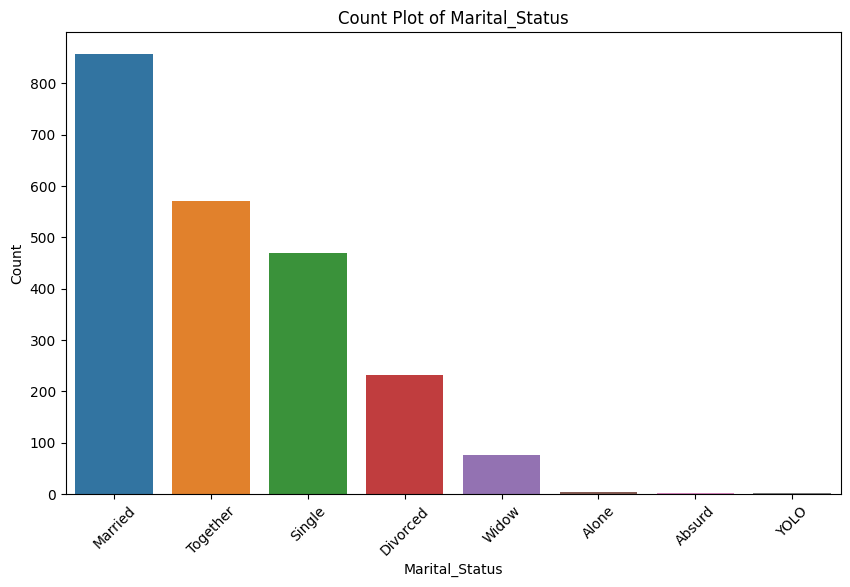

In [42]:
# List of categorical features
categorical_features = df_filtered.select_dtypes(include=['object']).columns.tolist()

# Loop through each categorical feature and plot a bar plot
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_filtered, x=feature, order=df_filtered[feature].value_counts().index)
    plt.title(f"Count Plot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


# Step 4: Data Preprocessing

### 4.1 Encode the categorical columns

In [43]:
# Import LabelEncoder for sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Education' column
df_filtered['Education'] = label_encoder.fit_transform(df_filtered['Education'])

# Encode 'Marital_Status' column
df_filtered['Marital_Status'] = label_encoder.fit_transform(df_filtered['Marital_Status'])


### 4.2 Standardize the data (PCA works best on standardized data)

In [44]:
# Standardizing the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filtered)

### 4.3 View the data

In [46]:
# Display the scaled data
scaled_data

array([[-1.01835202, -0.35254334,  0.25476002, ...,  0.        ,
         0.        ,  2.37542473],
       [-1.27478522, -0.35254334,  0.25476002, ...,  0.        ,
         0.        , -0.42097735],
       [-0.33453017, -0.35254334,  1.18314414, ...,  0.        ,
         0.        , -0.42097735],
       ...,
       [ 1.03311355, -0.35254334, -1.60200822, ...,  0.        ,
         0.        , -0.42097735],
       [-1.10382975,  0.53868622,  1.18314414, ...,  0.        ,
         0.        , -0.42097735],
       [-1.27478522,  1.42991579, -0.6736241 , ...,  0.        ,
         0.        ,  2.37542473]])

## 4.4 Principal Component Analysis(PCA)

### Reasons to Perform Principal Component Analysis (PCA)

1. **Dimensionality Reduction:**

  PCA reduces the dataset's dimensions by transforming it into fewer uncorrelated variables (principal components) while retaining most of the original variance. This is crucial for simplifying analysis and speeding up computational processes for downstream tasks, such as clustering or classification.

2. **Handling Multicollinearity:**

  Features like `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, and `AcceptedCmp5` may be highly correlated. PCA addresses this by combining these correlated features into a smaller number of principal components, eliminating multicollinearity and making models more robust.

3. **Data Visualization:**

  By reducing the data to 2 or 3 principal components, PCA allows for effective visual exploration of high-dimensional data, revealing relationships and clusters. For instance, visualizing interactions between Income and MntWines can uncover distinct customer segments.

4. **Noise Reduction:**

  PCA captures significant patterns while filtering out noise from less important features like `Complain` or `Teenhome`, enhancing the signal-to-noise ratio in the dataset and helping models focus on critical structures.

5. **Feature Interactions and Latent Structure:**

  PCA can uncover latent structures or interactions among features, such as how combinations of `Income`, `Recency`, and `MntWines` influence customer purchasing behavior. This understanding can reveal key drivers behind customer responses.

6. **Preprocessing for Clustering or Classification:**

  Before applying clustering techniques like K-means, PCA ensures that the input features are uncorrelated and highlights the most relevant patterns, improving clustering results.

### 4.4.1 Compute the Covariance Matrix:
Calculate the covariance matrix to understand how the variables relate to each other.

In [47]:
# Compute the covariance matrix
cov_matrix = np.cov(scaled_data, rowvar=False)

# View the covariance matrix
cov_matrix

array([[ 1.00045228e+00, -1.83867922e-01, -6.04920392e-02,
        -2.00067093e-01,  2.37604375e-01, -3.62095459e-01,
        -1.57014392e-02, -1.64689095e-01, -1.34530241e-02,
        -3.36371442e-02, -4.11724661e-02, -2.15258323e-02,
        -5.98062619e-02, -6.61861105e-02, -1.62338792e-01,
        -1.25913067e-01, -1.39060455e-01,  1.20336753e-01,
         6.11241838e-02, -7.00662552e-02,  1.90340232e-02,
        -1.19464222e-02, -7.82447248e-03, -4.60421679e-03,
         0.00000000e+00,  0.00000000e+00,  2.09466068e-02],
       [-1.83867922e-01,  1.00045228e+00,  4.15788326e-03,
         1.44951505e-01, -4.46550103e-02,  1.21014501e-01,
        -1.05173440e-02,  1.95978335e-01, -8.59877944e-02,
         3.74943502e-02, -1.17104421e-01, -1.09507924e-01,
        -1.01156666e-01,  2.55547559e-02,  8.08457563e-02,
         6.70402757e-02,  6.60160838e-02, -4.04327460e-02,
         5.43412051e-03,  5.86579581e-02,  2.99672219e-02,
        -1.01485536e-02,  2.13729591e-02, -4.22070854e-

### 4.4.2 Compute Eigenvalues and Eigenvectors:
Find the eigenvalues and eigenvectors of the covariance matrix.

In [50]:
# Check the shape of covariance matrix
cov_matrix.shape

(27, 27)

In [48]:
# Compute the eigenvalues, eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

### 4.4.3 Sort Eigenvalues and Select Principal Components:
Sort the eigenvalues in descending order and select the top k eigenvectors corresponding to the largest eigenvalues.

In [49]:
# Sort the eigenvalues in descending order and get the corresponding indices
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Sort the eigenvectors based on the indices of sorted eigenvalues
# This ensures the eigenvectors are ordered by their corresponding eigenvalues from largest to smallest
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Display the sorted eigenvectors
sorted_eigenvectors


array([[-6.03827876e-02,  3.57422074e-01, -9.06672152e-02,
         2.69453356e-01,  2.59480534e-01, -2.36219360e-01,
         7.28889735e-03, -1.86157858e-02, -2.93326158e-01,
        -3.81509808e-01, -6.90031706e-02, -3.59240413e-01,
        -1.89134539e-01,  1.91221739e-03, -1.25226080e-02,
        -9.41193778e-02,  4.68446471e-01,  1.08923066e-01,
         8.21924881e-02,  7.95937944e-02,  9.34338623e-02,
        -3.16151680e-03,  2.92893853e-02, -4.85421025e-03,
         5.83193885e-03,  0.00000000e+00,  0.00000000e+00],
       [ 2.02982971e-02, -2.41870975e-01, -1.26614499e-01,
        -2.77917990e-01, -4.61258077e-01, -1.96652109e-01,
         2.06743223e-01,  9.37957660e-03, -4.29887308e-01,
        -2.33265896e-01,  1.34004302e-02,  2.86630455e-01,
        -2.51655432e-01, -7.75350910e-02,  7.67069461e-02,
        -3.04029562e-01,  4.90232476e-02,  1.76459542e-01,
         4.01522295e-02, -1.18288473e-01,  2.46238500e-02,
         8.56966501e-02, -3.53700487e-02,  7.74265497e-

### 4.4.4 Calculate the explained variance ratio for each principal component.

In [51]:
# Calculate total variance (sum of eigenvalues)
total_variance = np.sum(sorted_eigenvalues)

# Calculate explained variance ratio for the first 10 components
explained_variance_ratio = sorted_eigenvalues[:10] / total_variance

# Print explained variance ratio for each component
for i, ev in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ev:.4f}")

Principal Component 1: 0.2691
Principal Component 2: 0.0843
Principal Component 3: 0.0771
Principal Component 4: 0.0582
Principal Component 5: 0.0470
Principal Component 6: 0.0408
Principal Component 7: 0.0402
Principal Component 8: 0.0398
Principal Component 9: 0.0380
Principal Component 10: 0.0333


### 4.4.5 Calculate Cumulative Explained Variance
Understand how much cumulative variance is explained by the principal components.

In [52]:
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print cumulative explained variance
for i, cev in enumerate(cumulative_explained_variance):
    print(f"Cumulative Explained Variance up to Component {i+1}: {cev:.4f}")

Cumulative Explained Variance up to Component 1: 0.2691
Cumulative Explained Variance up to Component 2: 0.3534
Cumulative Explained Variance up to Component 3: 0.4305
Cumulative Explained Variance up to Component 4: 0.4886
Cumulative Explained Variance up to Component 5: 0.5356
Cumulative Explained Variance up to Component 6: 0.5765
Cumulative Explained Variance up to Component 7: 0.6167
Cumulative Explained Variance up to Component 8: 0.6566
Cumulative Explained Variance up to Component 9: 0.6945
Cumulative Explained Variance up to Component 10: 0.7278


### 4.4.6 Plot "cumulative explained variance" vs "number of components"

In [ ]:
# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, 11))
plt.ylim(0, 1.05)
plt.grid()
plt.show()


### 4.4.7 Alternate Way of using PCA:
Perform PCA using sklearn directly, which simplifies the process and includes built-in methods to calculate explained variance and visualize it.

In [36]:
# Import the required library


# Steps remain the same till scaling the features
# Aplly pCA on scaled data
# Apply PCA, specify the number of components or leave empty for full decomposition


# Explained variance ratio


# Print explained variance for each component


## 4.5 Matrix Factorization: SVD - Singular Value Decomposition

## Reasons to Perform SVD

1. **Dimensionality Reduction:**

  SVD decomposes the data matrix into three matrices (U, Σ, and V). By retaining only the top singular values, SVD effectively reduces dimensionality, making it easier to analyze and visualize data.

2. **Handling Multicollinearity:**

  SVD transforms the data into a lower-dimensional space where correlations are minimized, effectively mitigating multicollinearity among features.

3. **Data Visualization:**

  SVD projects high-dimensional data into a lower-dimensional space, enabling visualization of the directions of maximum variance and helping to reveal insights in the data structure.

4. **Noise Reduction:**

  SVD allows the discarding of singular values that contribute little to the overall structure of the data, effectively reducing noise and improving the overall quality of the dataset.

5. **Feature Interactions and Latent Structure:**

  SVD uncovers underlying relationships and latent factors in the data, helping to understand how various features interact to influence customer behavior.

6. **Preprocessing for Clustering or Classification:**

  SVD serves as a powerful preprocessing tool, particularly beneficial in recommendation systems, where it reduces dimensionality while preserving essential data structure, enhancing the performance of machine learning algorithms.

### 4.5.1 Perform SVD manaullay by calculation U, Sigma, Vt

In [37]:
# Import the library svd

# Perform Singular Value Decomposition

# Check the shapes of the decomposed matrices


# Print the first few singular values (diagonal of Sigma matrix)


### 4.5.2 Calculate Explained Variance Using SVD

In [38]:
# Calculate the explained variance (similar to PCA's explained variance)

# Calculate cumulative explained variance


# Print the explained variance for the first few components


# Print cumulative explained variance



### 4.5.3 Plot "cumulative explained variance" vs "number of components"

In [39]:
# Plot the cumulative explained variance



### 4.5.4 Perform SVD using `sklearn`

In [40]:
# Import the library

# Apply Truncated SVD (specify the number of components to retain)

# Get the explained variance ratio

# Print explained variance ratio for each component
